In [7]:
l = []
import csv
with open('tweets-dataset.csv') as file:
    writer = csv.reader(file, delimiter = ',')
    #Creating a single string from csv file.
    text = ""
    for i in writer:
        text = text+str(i)+" "
#     print(t)

In [8]:
import re
from nltk.tokenize import TweetTokenizer
# remove URL's
text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
# remove symbols excluding the @, # and \s symbolt
text = re.sub(r'[^\s\w]', '', text)
text = re.sub(r'[@#]', ' ', text)
twt = TweetTokenizer()
text = twt.tokenize(text)

# lowercase, remove words less than len 2 & remove numbers in tokenized list
tokens =  [word.lower() for word in text if len(word) > 2 and not word.isdigit()] 
# print(ans)
print("Total number of tokens: ",len(tokens))
types = set(tokens)
print("Total number of types: ",len(types))
ttr = len(types)/len(tokens)
print("TTR is found: ",ttr)
# preprocess_text(result)

Total number of tokens:  249620
Total number of types:  39502
TTR is found:  0.15824853777742168


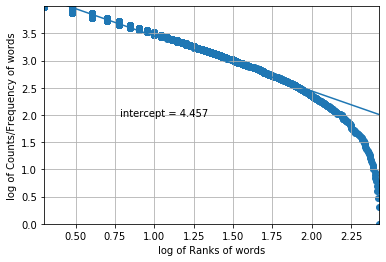

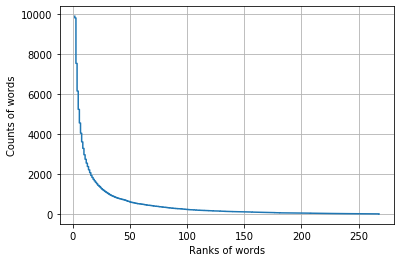

In [9]:
#Plot for zippf's length law

import nltk, math, pylab
from scipy import stats
fdist = nltk.FreqDist(tokens)
#Returns rank wise ordered list of tokens
words = fdist.most_common()[100:10000]

#x is log value of frequency of word
x = [math.log10(i[1]) for i in words]

#y is log value of rank of word
y = [math.log10(i) for i in range(1, len(words)+1)]


(m, b) = pylab.polyfit(x, y, 1)
yp = pylab.polyval([m, b], x)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)


pylab.plot(x, yp)
pylab.scatter(x, y)
pylab.ylim([min(y), max(y)])
pylab.xlim([min(x), max(x)])
pylab.grid(True)
pylab.ylabel('log of Counts/Frequency of words')
pylab.xlabel('log of Ranks of words')
pylab.figtext(.3, .5, "intercept = "+str(intercept)[:5])
pylab.show()


pylab.plot([i[1] for i in words], [i for i in range(1, len(words)+1)])
pylab.grid(True)
pylab.ylabel('Counts of words')
pylab.xlabel('Ranks of words')
pylab.show()



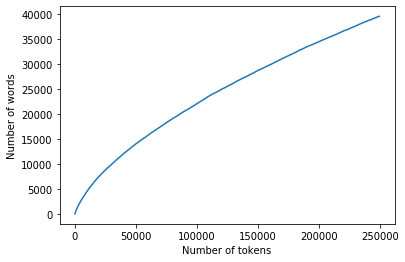

In [10]:
#For heap's law
#Set to ensure of types do  repeat
s = set()
n = len(tokens)
#Loop variables
x = 0
y = 0
#Number of tokens, types repectively for a,b
a = []
b = []
for i in range(n):
    if tokens[i] not in s:
        y+=1
        s.add(tokens[i])
    x += 1
    a.append(x)
    b.append(y)
# a = []

pylab.plot(a, b)
pylab.ylabel('Number of words')
pylab.xlabel('Number of tokens')
pylab.show()
        

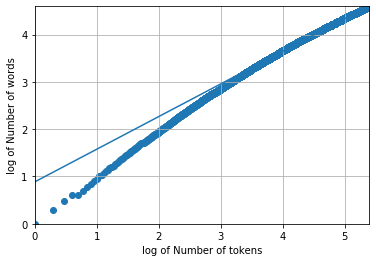

In [11]:
#For heap's law: Log plot with linear fit
a1 = [math.log10(i) for i in a]
b1 = [math.log10(i) for i in b]
# x.pop()


(m, b) = pylab.polyfit(a1, b1, 1)
yp = pylab.polyval([m, b], a1)

slope, intercept, r_value, p_value, std_err = stats.linregress(a1,b1)

pylab.plot(a1, yp)
pylab.scatter(a1, b1)
pylab.ylim([min(b1), max(b1)])
pylab.xlim([min(a1), max(a1)])
pylab.grid(True)
pylab.ylabel('log of Number of words')
pylab.xlabel('log of Number of tokens')
pylab.show()

[nltk_data] Downloading package wordnet to /home/vedanta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


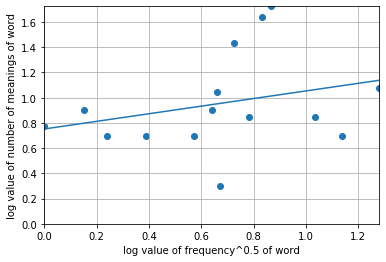

In [12]:
#Zippfs law of meanings

nltk.download('wordnet')
from nltk.corpus import wordnet 
l = ['blank','art','barking', 'news','truth','blowout','proof','smack','asleep','separately', 'regret', 'greek', 'laughing', 'bowling', 'night', 'sleep','shit', 'day', 'thinking', 'block']
ans = dict()
ans1 = dict()
for word in l:
    synonyms = []
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms.append(l.name())
    ans[(fdist[word])**0.5] = len(set(synonyms))
    ans1[(fdist[word])**0.5] = word
sorted_ans = sorted(ans.items(), key=lambda kv: kv[0]) 

a1 = []
b1 = []
for i in range(len(sorted_ans)):
    a1.append(math.log10(sorted_ans[i][0]))
    b1.append(math.log10(sorted_ans[i][1]))


(m, b) = pylab.polyfit(a1, b1, 1)
yp = pylab.polyval([m, b], a1)

slope, intercept, r_value, p_value, std_err = stats.linregress(a1,b1)

# print(intercept)
pylab.plot(a1, yp)
pylab.scatter(a1, b1)
pylab.ylim([min(a1), max(b1)])
pylab.xlim([min(a1), max(a1)])
pylab.grid(True)
pylab.ylabel('log value of number of meanings of word')
pylab.xlabel('log value of frequency^0.5 of word')
pylab.show()
# pylab.plot(a1,b1)